In [1]:
import pandas as pd
import sqlalchemy
import numpy as np
from sqlalchemy import create_engine
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import config

### Connecting to the DB to fetch the data.

In [2]:
dbtype = config.database_new['dbtype']
user = config.database_new['user']
password = config.database_new['password']
ip = config.database_new['ip']
port = config.database_new['port']
name = config.database_new['name']

engine = create_engine(f'{dbtype}://{user}:{password}@{ip}:{port}/{name}')

In [3]:
df = pd.read_sql_table('instagram_competitors',engine)
df_posts = pd.read_sql_table('instagram_competitors_posts', engine)

df['date_ymd'] = df['date'].dt.date
df_posts['date_ymd'] = df_posts['date'].dt.date

df.drop(columns = ['date'], inplace = True)

In [4]:
companies = {'Cortefiel':'Tendam',
             'FIFTY (Grupo Tendam)':'Tendam',
             "Women's secret":'Tendam',
             'SPRINGFIELD':'Tendam',
             'Pedro del Hierro':'Tendam',
             'Scalpers':'Scalpers',
             'B L U E ✖️ B A N A N A':'bluebanana',
             'Pull&Bear':'Inditex',
             'Massimo Dutti':'Inditex',
             'OYSHO':'Inditex',
             'Zara Official':'Inditex',
             'Zara Home':'Inditex',
             'Goiko Basics':'LVMH',
             'GOIKO':'LVMH',
             'Sushi Yakuza':'LVMH',
             'Zalando':'Kinnevik',
             'Zalando Man':'Kinnevik',
             'Superga':'Basicnet'}

In [5]:
df['parent_company'] = df['full_name'].map(companies)

In [6]:
df_posts['full_name'].replace(['cortefiel_official','pedrodelhierro_official', 'fiftyoutlet_official', 'springfieldmw', 'womensecretofficial'],
                                  ['cortefiel','pedro_del_hierro', 'fifty', 'springfield', 'women_secret'], inplace = True)
df['full_name'].replace(['Cortefiel','Pedro del Hierro', 'FIFTY (Grupo Tendam)', 'SPRINGFIELD', "Women'secret"],
                            ['cortefiel','pedro_del_hierro', 'fifty', 'springfield', 'women_secret'], inplace = True)

In [7]:
df_instagram = pd.merge(df_posts, df, how = 'inner', on = ['date_ymd', 'full_name'])

In [8]:
df_instagram

,likes,comments,date,is_video,full_name,date_ymd,followers,parent_company
0,1325,26,2020-09-27 08:00:44,False,cortefiel,2020-09-27,166445,Tendam
1,261,0,2020-09-26 10:34:45,False,cortefiel,2020-09-26,166415,Tendam
2,625,0,2020-09-25 12:38:00,False,cortefiel,2020-09-25,166382,Tendam
3,323,9,2020-09-24 18:10:22,True,cortefiel,2020-09-24,166377,Tendam
4,1648,26,2020-09-23 15:17:19,False,cortefiel,2020-09-23,166375,Tendam
...,...,...,...,...,...,...,...,...
125,7127,3,2020-09-04 11:00:36,True,springfield,2020-09-04,466107,Tendam
126,15971,6,2020-09-03 13:00:23,False,springfield,2020-09-03,466447,Tendam
127,15823,1,2020-09-01 18:00:10,False,springfield,2020-09-01,466811,Tendam
128,16997,10,2020-08-31 18:00:18,False,springfield,2020-08-31,466976,Tendam


In [9]:
df_instagram.full_name.unique()

array(['cortefiel', 'women_secret', 'pedro_del_hierro', 'fifty',
       'springfield'], dtype=object)

In [10]:
df_instagram.sort_values('date', ascending = True, inplace = True)

df_instagram['followers_difference'] = df_instagram.groupby('full_name')['followers'].diff()
df_instagram['followers_difference'].fillna(0, inplace = True)
df_instagram['positive'] = df_instagram['followers_difference'] > 0

df_instagram['interactions'] = df_instagram['likes'] + df_instagram['comments']

In [11]:
grupo_tendam = {} 
cortefiel = df_instagram[df_instagram['full_name']=='cortefiel']
grupo_tendam["cortefiel"] = cortefiel

pedro_del_hierro = df_instagram[df_instagram['full_name']=='pedro_del_hierro']
grupo_tendam["pedro_del_hierro"] = pedro_del_hierro

fifty = df_instagram[df_instagram['full_name']=='fifty']
grupo_tendam["fifty"] = fifty

springfield = df_instagram[df_instagram['full_name']=='springfield']
grupo_tendam["springfield"] = springfield

women_secret = df_instagram[df_instagram['full_name']=="women_secret"]
grupo_tendam["women_secret"] = women_secret

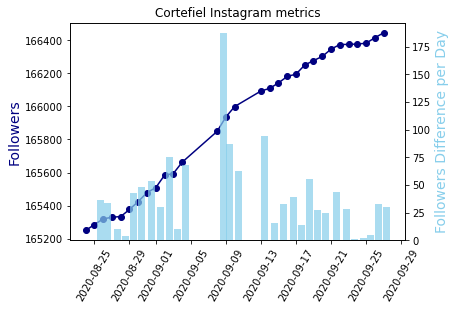

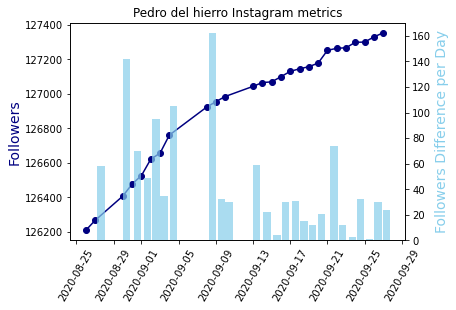

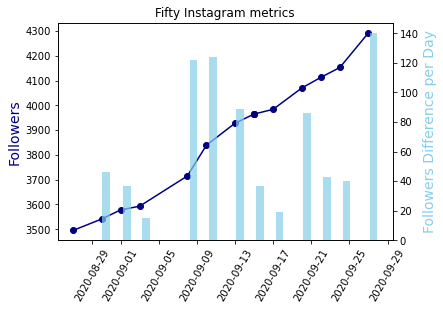

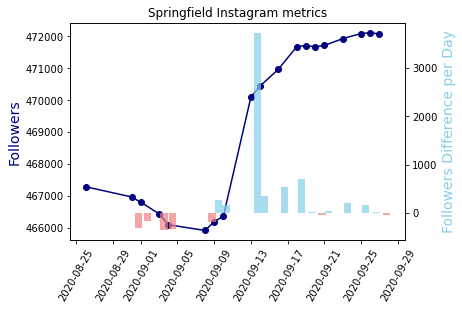

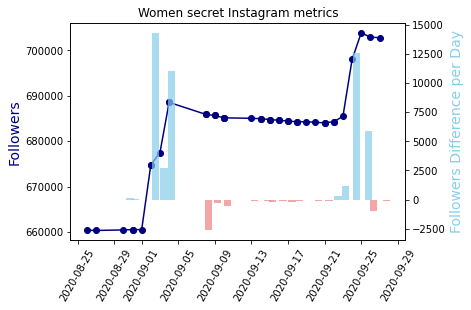

In [12]:
for title, data_dict in grupo_tendam.items():
    fig,ax = plt.subplots()
    ax.plot(data_dict['date_ymd'], data_dict['followers'], color="navy", marker="o")
    ax.set_ylabel("Followers", color="navy",fontsize=14)
    plt.xticks(rotation=60)
    plt.title(str(title).capitalize().replace('_', ' ') + ' Instagram metrics')
    ax2=ax.twinx()
    ax2.bar(data_dict['date'], data_dict['followers_difference'], color=data_dict['positive'].map({True: 'skyblue', False: 'lightcoral'}), alpha = 0.7)
    ax2.set_ylabel("Followers Difference per Day", color="skyblue", fontsize=14)

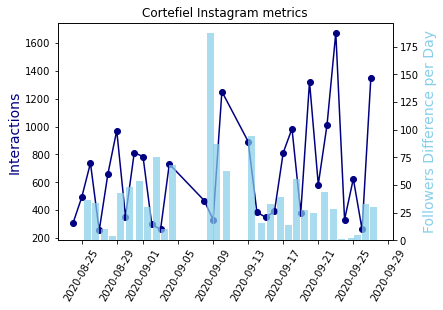

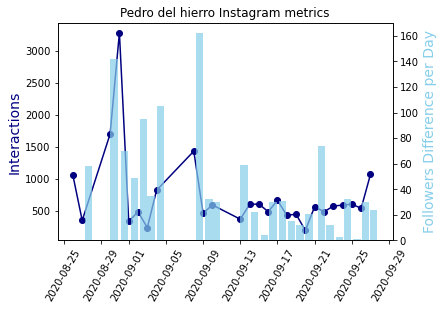

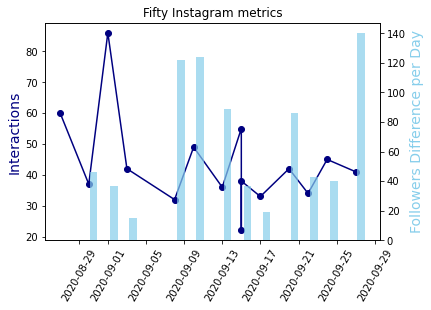

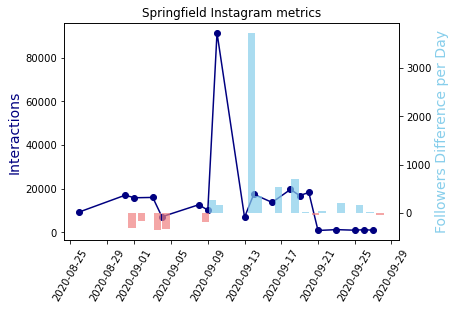

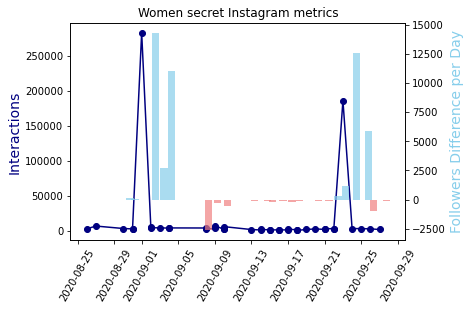

In [13]:
for title, data_dict in grupo_tendam.items():
    fig,ax = plt.subplots()
    ax.plot(data_dict['date_ymd'], data_dict['interactions'], color="navy", marker="o")
    ax.set_ylabel("Interactions", color="navy",fontsize=14)
    plt.xticks(rotation=60)
    plt.title(str(title).capitalize().replace('_', ' ') + ' Instagram metrics')
    ax2=ax.twinx()
    ax2.bar(data_dict['date'], data_dict['followers_difference'], color=data_dict['positive'].map({True: 'skyblue', False: 'lightcoral'}), alpha = 0.7)
    ax2.set_ylabel("Followers Difference per Day", color="skyblue", fontsize=14)

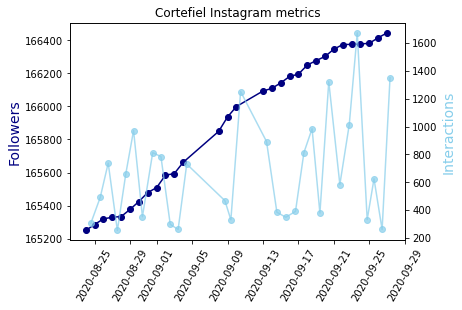

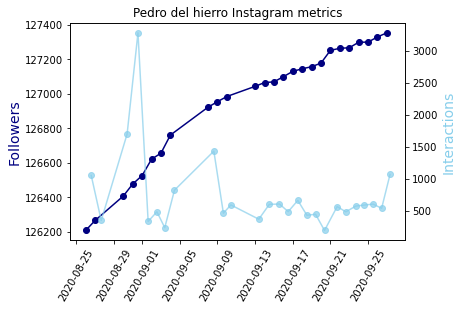

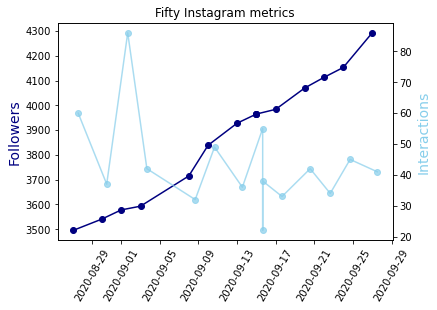

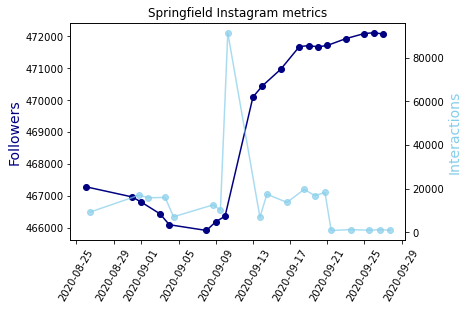

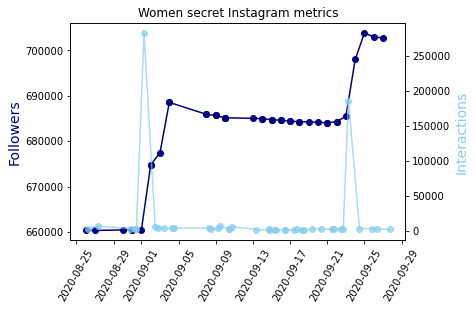

In [14]:
for title, data_dict in grupo_tendam.items():
    fig,ax = plt.subplots()
    ax.plot(data_dict['date_ymd'], data_dict['followers'], color="navy", marker="o")
    ax.set_ylabel("Followers", color="navy",fontsize=14)
    plt.xticks(rotation=60)
    plt.title(str(title).capitalize().replace('_', ' ') + ' Instagram metrics')
    ax2=ax.twinx()
    ax2.plot(data_dict['date'], data_dict['interactions'], color='skyblue', alpha = 0.7, marker="o")
    ax2.set_ylabel("Interactions", color="skyblue", fontsize=14)

In [15]:
df_insta_ts = pd.pivot_table(df_instagram[['date_ymd', 'full_name', 'followers']], values='followers', index=['date_ymd'], columns=['full_name'], aggfunc=np.sum).bfill()

In [16]:
df_insta_ts

full_name,cortefiel,fifty,pedro_del_hierro,springfield,women_secret
date_ymd,,,,,
2020-08-24,165250.0,3495.0,126207.0,467295.0,660368.0
2020-08-25,165286.0,3495.0,126207.0,467295.0,660368.0
2020-08-26,165320.0,3495.0,126207.0,467295.0,660368.0
2020-08-27,165330.0,3495.0,126265.0,466976.0,660317.0
2020-08-28,165334.0,3541.0,126407.0,466976.0,660439.0
2020-08-29,165377.0,3541.0,126407.0,466976.0,660439.0
2020-08-30,165425.0,3541.0,126407.0,466976.0,660439.0
2020-08-31,165479.0,3578.0,126477.0,466976.0,1321022.0
2020-09-01,165509.0,3578.0,126526.0,466811.0,660485.0


In [17]:
df_insta_ts.corr()

full_name,cortefiel,fifty,pedro_del_hierro,springfield,women_secret
full_name,,,,,
cortefiel,1.000000,0.268090,0.990465,0.866196,0.233305
fifty,0.268090,1.000000,0.265683,0.286648,0.267356
pedro_del_hierro,0.990465,0.265683,1.000000,0.807397,0.281279
springfield,0.866196,0.286648,0.807397,1.000000,-0.074609
women_secret,0.233305,0.267356,0.281279,-0.074609,1.000000


In [18]:
df_instagram[['date_ymd', 'full_name', 'followers']].groupby(['full_name', 'date_ymd'])['followers'].sum().reset_index()

,full_name,date_ymd,followers
0,cortefiel,2020-08-24,165250
1,cortefiel,2020-08-25,165286
2,cortefiel,2020-08-26,165320
3,cortefiel,2020-08-27,165330
4,cortefiel,2020-08-28,165334
...,...,...,...
109,women_secret,2020-09-23,685446
110,women_secret,2020-09-24,697991
111,women_secret,2020-09-25,703869
112,women_secret,2020-09-26,702921


In [19]:
df_instagram.corr()

,likes,comments,is_video,followers,followers_difference,positive,interactions
likes,1.000000,0.817284,-0.048193,0.366251,0.049619,-0.195438,0.889413
comments,0.817284,1.000000,-0.048987,0.160627,0.000727,-0.051067,0.990303
is_video,-0.048193,-0.048987,1.000000,-0.008707,-0.024314,-0.013715,-0.050479
followers,0.366251,0.160627,-0.008707,1.000000,0.212447,-0.633076,0.215720
followers_difference,0.049619,0.000727,-0.024314,0.212447,1.000000,0.194310,0.012540
positive,-0.195438,-0.051067,-0.013715,-0.633076,0.194310,1.000000,-0.087628
interactions,0.889413,0.990303,-0.050479,0.215720,0.012540,-0.087628,1.000000
